<a href="https://colab.research.google.com/github/CoderGirllll/Sign-2-Speech_Project/blob/main/SIGN_LANGUAGE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

importing and loading the dataset

In [ ]:
from google.colab import files
files.upload()


In [ ]:
def load_data(path):
    df = pd.read_csv('/content/sign_mnist_train.csv')
    y = np.array([label if label < 9
                  else label-1 for label in df['label']])
    df = df.drop('label', axis=1)
    x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
                  for i in range(len(df))]).astype(float)
    x = np.expand_dims(x, axis=3)
    y = pd.get_dummies(y).values

    return x, y

X_train, Y_train = load_data('/content/sign_mnist_train.csv')
X_test, Y_test = load_data('/content/sign_mnist_test.csv')
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(21964, 28, 28, 1) (21964, 24)
(27455, 28, 28, 1) (27455, 24)


 visualize images for signs of some of the alphabets which have been provided to us to build the classifier for each class.

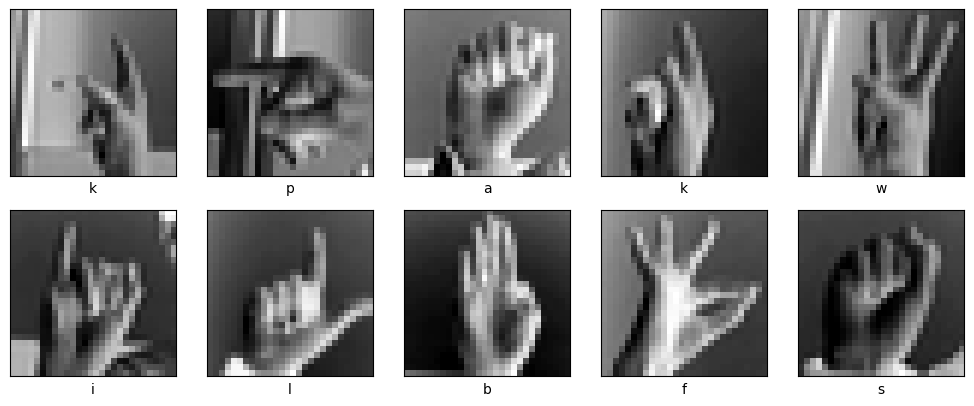

In [ ]:
class_names = list(string.ascii_lowercase[:26].replace(
    'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()

Three Convolutional Layers followed by MaxPooling layers.
Flatten Layer to flatten the output of the convolutional layers.
Fully Connected Layers followed by the output layer.
BatchNormalization Layers to enable stable and fast training.
Dropout Layer to avoid overfitting.
The final output layer will have 24 units corresponding to the 24 alphabet classes.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1600)           │         6,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 442,264 (1.69 MB)

 Trainable params: 438,552 (1.67 MB)

 Non-trainable params: 3,712 (14.50 KB)

When compiling the model, we provide three essential parameters:

Optimizer: The method used to optimize the cost function (e.g., gradient descent).
Loss Function: The function used to evaluate the model's performance.
Metrics: Metrics used to evaluate the model during training and testing.

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7574 - loss: 0.8811 - val_accuracy: 0.9873 - val_loss: 0.0533
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9976 - loss: 0.0245 - val_accuracy: 0.9978 - val_loss: 0.0103
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9913 - loss: 0.0392 - val_accuracy: 0.9627 - val_loss: 0.1274
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9967 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9975 - loss: 0.0129 - val_accuracy: 0.9936 - val_loss: 0.0308
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.9974 - loss: 0.0112 - val_accuracy: 0.9938 - val_loss: 0.0168
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9846 - loss: 0.0474 - val_accuracy: 0.9998 - val_loss: 8.8354e-04
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9993 - loss: 0.005

model evaluation

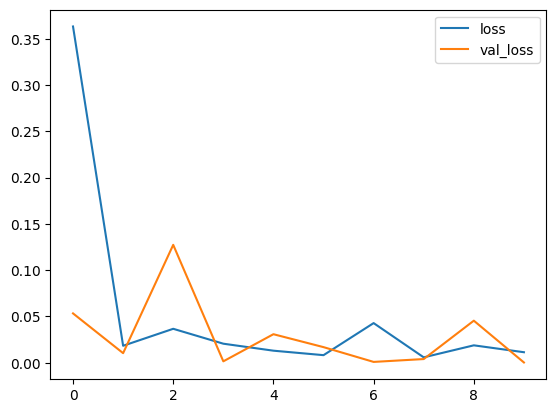

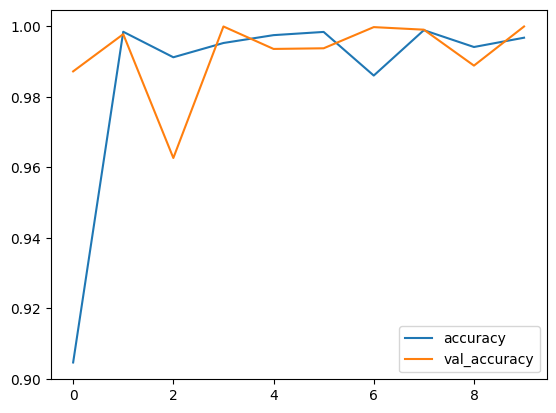

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 1.0000 - loss: 3.1603e-04
Test Accuracy: 100.00%
